In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#1.Import a 311 NYC service request.
Req = pd.read_csv("311_Service_Requests_from_2010_to_Present.csv")

Req.replace('Unspecified',np.NaN,inplace=True)


/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
Req

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300693,30281872,03/29/2015 12:33:41 AM,NaN,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,NaN,CRESCENT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300694,30281230,03/29/2015 12:33:28 AM,03/29/2015 02:33:59 AM,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11418.0,100-17 87 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.694077,-73.846087,"(40.69407728322387, -73.8460866160573)"
300695,30283424,03/29/2015 12:33:03 AM,03/29/2015 03:40:20 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11206.0,162 THROOP AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.699590,-73.944234,"(40.69959035300927, -73.94423377144169)"
300696,30280004,03/29/2015 12:33:02 AM,03/29/2015 04:38:35 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10461.0,3151 EAST TREMONT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.837708,-73.834587,"(40.8377075854206, -73.83458731019586)"


In [4]:

remove_columns= ['Agency Name','Incident Address','Street Name','Cross Street 1','Cross Street 2','Intersection Street 1',
'Intersection Street 2','Address Type','Park Facility Name','Park Borough','School Name',
'School Number','School Region','School Code','School Phone Number','School Address','School City',
'School State','School Zip','School Not Found','School or Citywide Complaint','Vehicle Type',
'Taxi Company Borough','Taxi Pick Up Location','Bridge Highway Name','Bridge Highway Direction',
'Road Ramp','Bridge Highway Segment','Garage Lot Name','Ferry Direction','Ferry Terminal Name','Landmark',
'X Coordinate (State Plane)','Y Coordinate (State Plane)','Due Date','Resolution Action Updated Date','Community Board','Facility Type',
'Location']

In [5]:

Req.drop(remove_columns, inplace=True, axis=1)
Req = Req[Req['Status']=='Closed']
Req = Req[(Req['Latitude'].notnull())& (Req['Longitude'].notnull()) & (Req['Descriptor'].notnull())]
Req.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 291204 entries, 0 to 300697
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unique Key              291204 non-null  int64  
 1   Created Date            291204 non-null  object 
 2   Closed Date             291204 non-null  object 
 3   Agency                  291204 non-null  object 
 4   Complaint Type          291204 non-null  object 
 5   Descriptor              291204 non-null  object 
 6   Location Type           291149 non-null  object 
 7   Incident Zip            291164 non-null  float64
 8   City                    291164 non-null  object 
 9   Status                  291204 non-null  object 
 10  Resolution Description  291204 non-null  object 
 11  Borough                 291204 non-null  object 
 12  Latitude                291204 non-null  float64
 13  Longitude               291204 non-null  float64
dtypes: float64(3), int64

In [6]:
#2.Read or convert the columns ‘Created Date’ and Closed Date’ to datetime datatype and 
#create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing. 
#(Hint: Explore the package/module datetime)
Req["created Date"] = pd.to_datetime(Req["Created Date"])
Req["closed Date"] = pd.to_datetime(Req["Closed Date"])
Req.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 291204 entries, 0 to 300697
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Unique Key              291204 non-null  int64         
 1   Created Date            291204 non-null  object        
 2   Closed Date             291204 non-null  object        
 3   Agency                  291204 non-null  object        
 4   Complaint Type          291204 non-null  object        
 5   Descriptor              291204 non-null  object        
 6   Location Type           291149 non-null  object        
 7   Incident Zip            291164 non-null  float64       
 8   City                    291164 non-null  object        
 9   Status                  291204 non-null  object        
 10  Resolution Description  291204 non-null  object        
 11  Borough                 291204 non-null  object        
 12  Latitude                291204

In [7]:
Req["Request_Closing_Time"] = Req["closed Date"] - Req["created Date"]
Req["Request_Closing_Hours"] = Req["Request_Closing_Time"].astype('timedelta64[h]')+1
Req['Resolution_Time'] = (Req['closed Date'] - Req['created Date']).dt.total_seconds()

In [8]:
Req

,Unique Key,Created Date,Closed Date,Agency,Complaint Type,Descriptor,Location Type,Incident Zip,City,Status,Resolution Description,Borough,Latitude,Longitude,created Date,closed Date,Request_Closing_Time,Request_Closing_Hours,Resolution_Time
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,NEW YORK,Closed,The Police Department responded and upon arriv...,MANHATTAN,40.865682,-73.923501,2015-12-31 23:59:45,2016-01-01 00:55:00,00:55:15,1.0,3315.0
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,Blocked Driveway,No Access,Street/Sidewalk,11105.0,ASTORIA,Closed,The Police Department responded to the complai...,QUEENS,40.775945,-73.915094,2015-12-31 23:59:44,2016-01-01 01:26:00,01:26:16,2.0,5176.0
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,Blocked Driveway,No Access,Street/Sidewalk,10458.0,BRONX,Closed,The Police Department responded and upon arriv...,BRONX,40.870325,-73.888525,2015-12-31 23:59:29,2016-01-01 04:51:00,04:51:31,5.0,17491.0
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,BRONX,Closed,The Police Department responded to the complai...,BRONX,40.835994,-73.828379,2015-12-31 23:57:46,2016-01-01 07:43:00,07:45:14,8.0,27914.0
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,ELMHURST,Closed,The Police Department responded and upon arriv...,QUEENS,40.733060,-73.874170,2015-12-31 23:56:58,2016-01-01 03:24:00,03:27:02,4.0,12422.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300692,30281370,03/29/2015 12:34:32 AM,03/29/2015 01:13:01 AM,NYPD,Noise - Commercial,Loud Music/Party,Store/Commercial,10002.0,NEW YORK,Closed,The Police Department responded to the complai...,MANHATTAN,40.716053,-73.991378,2015-03-29 00:34:32,2015-03-29 01:13:01,00:38:29,1.0,2309.0
300694,30281230,03/29/2015 12:33:28 AM,03/29/2015 02:33:59 AM,NYPD,Blocked Driveway,Partial Access,Street/Sidewalk,11418.0,RICHMOND HILL,Closed,The Police Department responded and upon arriv...,QUEENS,40.694077,-73.846087,2015-03-29 00:33:28,2015-03-29 02:33:59,02:00:31,3.0,7231.0
300695,30283424,03/29/2015 12:33:03 AM,03/29/2015 03:40:20 AM,NYPD,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11206.0,BROOKLYN,Closed,The Police Department responded to the complai...,BROOKLYN,40.699590,-73.944234,2015-03-29 00:33:03,2015-03-29 03:40:20,03:07:17,4.0,11237.0
300696,30280004,03/29/2015 12:33:02 AM,03/29/2015 04:38:35 AM,NYPD,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10461.0,BRONX,Closed,The Police Department responded to the complai...,BRONX,40.837708,-73.834587,2015-03-29 00:33:02,2015-03-29 04:38:35,04:05:33,5.0,14733.0


In [9]:
Req.Descriptor.unique()

array(['Loud Music/Party', 'No Access', 'Commercial Overnight Parking',
       'Blocked Sidewalk', 'Posted Parking Sign Violation',
       'Blocked Hydrant', 'With License Plate', 'Partial Access',
       'Unauthorized Bus Layover', 'Double Parked Blocking Vehicle',
       'Vehicle', 'Loud Talking', 'Banging/Pounding', 'Car/Truck Music',
       'Tortured', 'In Prohibited Area', 'Double Parked Blocking Traffic',
       'Congestion/Gridlock', 'Neglected', 'Car/Truck Horn', 'In Public',
       'Other (complaint details)', 'No Shelter', 'Truck Route Violation',
       'Unlicensed', 'Overnight Commercial Storage', 'Engine Idling',
       'After Hours - Licensed Est', 'Detached Trailer',
       'Underage - Licensed Est', 'Chronic Stoplight Violation',
       'Loud Television', 'Chained', 'Building', 'In Car',
       'Police Report Requested', 'Chronic Speeding',
       'Playing in Unsuitable Place', 'Drag Racing',
       'Police Report Not Requested', 'Nuisance/Truant'], dtype=object)

In [10]:
Req['Complaint Type'].unique()

array(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking',
       'Derelict Vehicle', 'Noise - Commercial',
       'Noise - House of Worship', 'Posting Advertisement',
       'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic',
       'Drinking', 'Noise - Park', 'Graffiti', 'Disorderly Youth'],
      dtype=object)

In [11]:
#3.Provide major insights/patterns that you can offer in a visual format (graphs or tables); 
#at least 4 major conclusions that you can come up with after generic data mining.
complaint = pd.DataFrame({"Total":Req.groupby(["Complaint Type","Location Type","Descriptor"]).size()})
complaint

Total
Complaint Type Location Type              Descriptor               
Animal Abuse   Commercial                 No Shelter             62
               House and Store            No Shelter             93
               Park/Playground            Chained                11
                                          In Car                  4
                                          Neglected              30
...                                                             ...
Vending        Residential Building/House Unlicensed             78
               Store/Commercial           In Prohibited Area    268
                                          Unlicensed            164
               Street/Sidewalk            In Prohibited Area   1585
                                          Unlicensed           1452

[107 rows x 1 columns]

In [12]:
Req.groupby(["Borough","Complaint Type","Descriptor","Location Type"]).size()

Borough        Complaint Type  Descriptor          Location Type             
BRONX          Animal Abuse    Chained             Park/Playground                3
                                                   Parking Lot                    2
                                                   Residential Building/House    76
                                                   Store/Commercial              13
                                                   Street/Sidewalk               37
                                                                                 ..
STATEN ISLAND  Vending         In Prohibited Area  Store/Commercial               1
                                                   Street/Sidewalk                4
                               Unlicensed          Residential Building/House     2
                                                   Store/Commercial               3
                                                   Street/Sidewalk               1

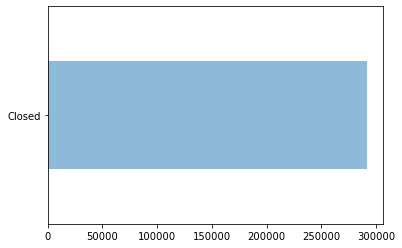

In [13]:
a = Req.Status
pl = a.value_counts()
pl.plot.barh(alpha=0.5)
plt.show()

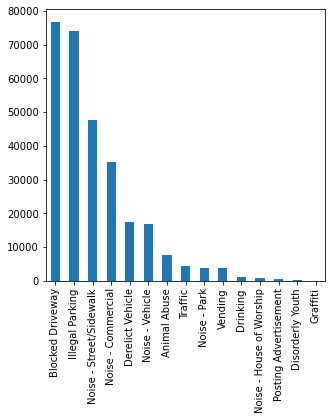

In [14]:
b = Req["Complaint Type"].value_counts().head(15)
b.plot(kind='bar',figsize=(5,5));

Borough        Complaint Type         
BRONX          Animal Abuse               26403.326964
               Blocked Driveway           22543.071972
               Derelict Vehicle           33151.318625
               Disorderly Youth           15258.269841
               Drinking                   20856.893617
                                              ...     
STATEN ISLAND  Noise - Street/Sidewalk    10665.435049
               Noise - Vehicle            11655.525281
               Posting Advertisement       5551.341748
               Traffic                    12632.729592
               Vending                    15377.360000
Name: Resolution_Time, Length: 75, dtype: float64


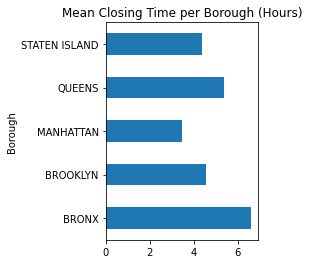

In [15]:
#4.Order the complaint types based on the average ‘Request_Closing_Time’, 
#grouping them for different locations.
Req_avg = Req.groupby(['Borough','Complaint Type']).Resolution_Time.mean()
print(Req_avg)
plt.subplot(1, 2, 2)
Bpreq = Req.groupby("Borough")["Request_Closing_Hours"].mean()
Bpreq.plot(kind='barh',title='Mean Closing Time per Borough (Hours)');
plt.show()

In [16]:
#5.Perform a statistical test for the following:
#Whether the average response time across complaint types is similar or not (overall)
#Are the type of complaint or service requested and location related?


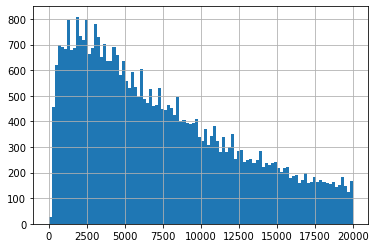

In [17]:
original = Req[Req['Complaint Type']=='Noise - Street/Sidewalk']['Resolution_Time']
original.hist(bins=100,range=(0,20000))

In [18]:
original.describe()

count    4.777100e+04
mean     1.239099e+04
std      1.962794e+04
min      1.200000e+02
25%      3.600000e+03
50%      7.920000e+03
75%      1.549400e+04
max      2.134342e+06
Name: Resolution_Time, dtype: float64

In [19]:
dataset = {}
for complaint in Req['Complaint Type'].unique():
    dataset[complaint] = np.log(Req[Req['Complaint Type']==complaint]['Resolution_Time'])

In [20]:
print(dataset.keys())
print(dataset.values())


dict_keys(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking', 'Derelict Vehicle', 'Noise - Commercial', 'Noise - House of Worship', 'Posting Advertisement', 'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic', 'Drinking', 'Noise - Park', 'Graffiti', 'Disorderly Youth'])
dict_values([0         8.106213
12        9.097955
19        7.946264
38        7.477604
54        8.591187
            ...   
300674    9.040738
300675    8.213382
300681    9.254357
300683    9.263312
300689    9.483340
Name: Resolution_Time, Length: 47771, dtype: float64, 1          8.551788
2          9.769442
7          8.775704
9          8.513587
10        10.242884
            ...    
300665     8.381832
300672    10.942810
300679     8.377931
300687     8.998755
300694     8.886133
Name: Resolution_Time, Length: 76697, dtype: float64, 3         10.236884
4          9.427224
5          8.826147
6          8.860499
8         10.334685
            ...    
300643     9.266343
300658     8.507951


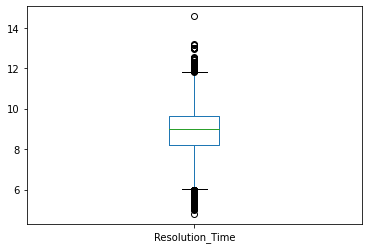

In [21]:
dataset['Noise - Street/Sidewalk'].plot(kind='box')


In [22]:
for complaint in dataset.keys():
    print(dataset[complaint].std())

1.1032117274723865
0.9758963165873512
1.077599608068399
1.257971247731351
1.08907743524662
1.1752462576623628
1.2223658746794284
1.07658431058284
1.0439349377372096
1.1124255292109804
1.1843549664736033
1.0458924956187043
1.119443436237754
1.0644915295126962
1.0383245818152775


In [23]:
[complaint for complaint in dataset.keys() ]


['Noise - Street/Sidewalk',
 'Blocked Driveway',
 'Illegal Parking',
 'Derelict Vehicle',
 'Noise - Commercial',
 'Noise - House of Worship',
 'Posting Advertisement',
 'Noise - Vehicle',
 'Animal Abuse',
 'Vending',
 'Traffic',
 'Drinking',
 'Noise - Park',
 'Graffiti',
 'Disorderly Youth']

Null Hypothesis: Average response time for all the complaints type is same.

Alternate Hypothesis: Average response time for all the complaints type is not same and theres is some difference among the groups.

Below We conduct ANOVA test for top 5 type of complaints
For a 95% of confidence interval we choose our alpha as 0.05 for 5%
Alpha(0.05) is the critical p-value, if our calculated p-value is less than alpha, it will give us strong evidence to reject Null Hypothesis.

if p < alpha(0.05) : Reject Null Hypothesis, Average response time for all the complaints type is not same.

if p > alpha(0.05) : Fail to reject Null Hypothesis, Average response time for all the complaints type is same

In [24]:
from scipy.stats import f_oneway

stat, p = f_oneway(dataset['Noise - Street/Sidewalk'],dataset['Blocked Driveway'],dataset['Illegal Parking'],dataset['Derelict Vehicle'],
                   dataset['Noise - Commercial'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')
    

Statistics=2454.983, p=0.000
Different distributions (reject H0)


As our p-value is quite low , hence it is being converted to 0.0
Since our p-value is lowere that our critical p-value, we will conclude that we have enogh evidence to reject pur Null Hypothesis and that

"Average response time for all the complaints type is not same."

In [25]:
sample = Req[['Complaint Type','Borough','Longitude','Latitude','City']].astype('category')


In [26]:
sample['Complaint Type'] = sample['Complaint Type'].cat.codes
sample['Borough'] = sample['Borough'].cat.codes
sample['City'] = sample['City'].cat.codes

In [27]:
sample.head()


,Complaint Type,Borough,Longitude,Latitude,City
0,10,2,-73.923501,40.865682,33
1,1,3,-73.915094,40.775945,1
2,1,0,-73.888525,40.870325,6
3,6,0,-73.828379,40.835994,6
4,6,3,-73.874170,40.733060,13


"As we can see from above table, there is no relationship between type of complaint or service requested and location."